In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

In [2]:
import  tensorflow as tf

I import the dataset , i downloaded it from kaggle

In [3]:

data = pd.read_csv("housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
X= data.drop(["median_house_value"],axis=1)
Y= data["median_house_value"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2)

In [8]:
train_data= X_train.join(Y_train)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

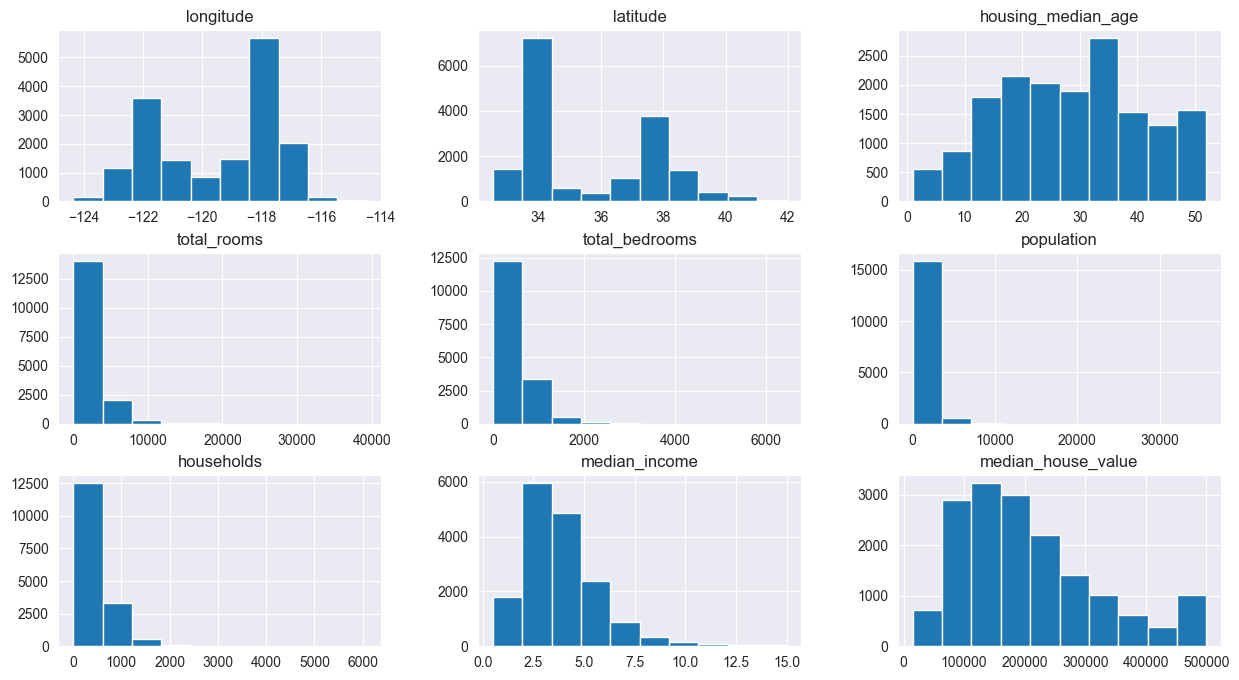

In [9]:
train_data.hist(figsize=(15,8))

corr() doesn't support string values, so i deleted that column

In [10]:
train_data_2= data.drop(["ocean_proximity"],axis=1)


<Axes: >

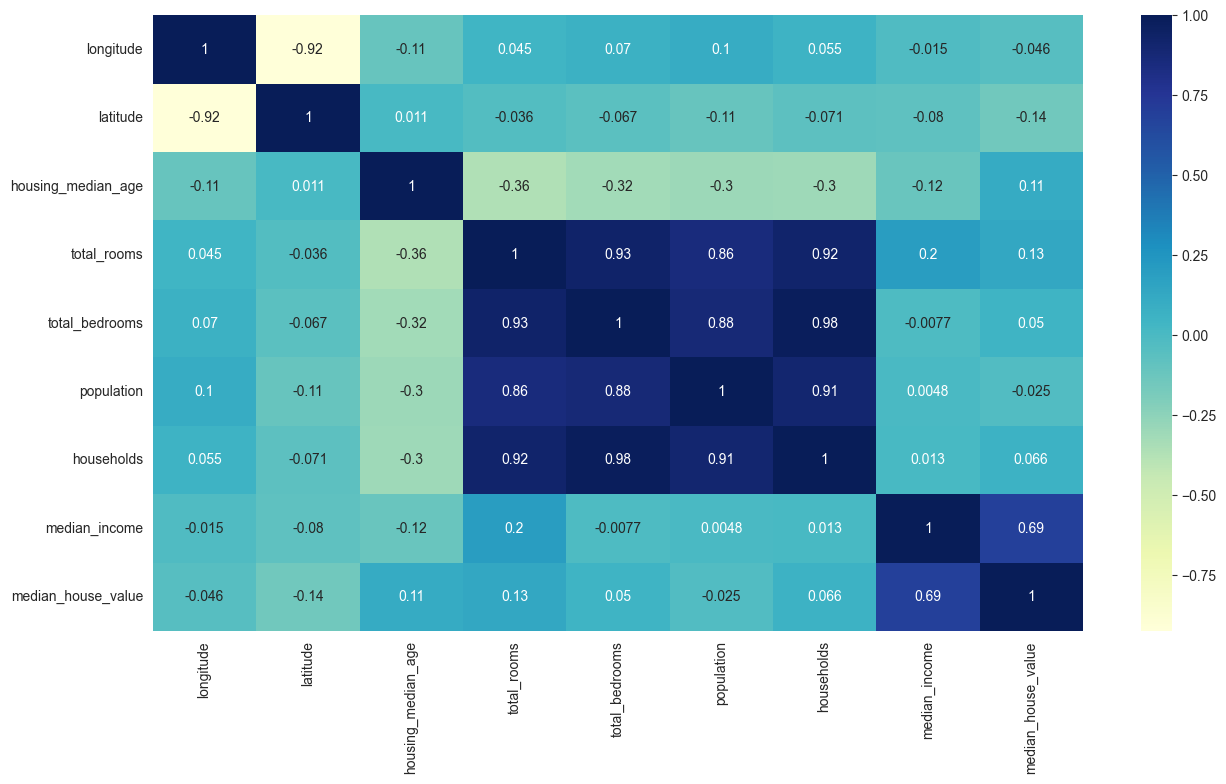

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_2.corr(),annot=True,cmap="YlGnBu")

till now i v just been explorig data

i'm converting some column values to log cuz they'r big

In [12]:
train_data_2["total_rooms"]=np.log(train_data_2["total_rooms"]+1)
train_data_2["total_bedrooms"]=np.log(train_data_2["total_bedrooms"]+1)
train_data_2["population"]=np.log(train_data_2["population"]+1)
train_data_2["households"]=np.log(train_data_2["population"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

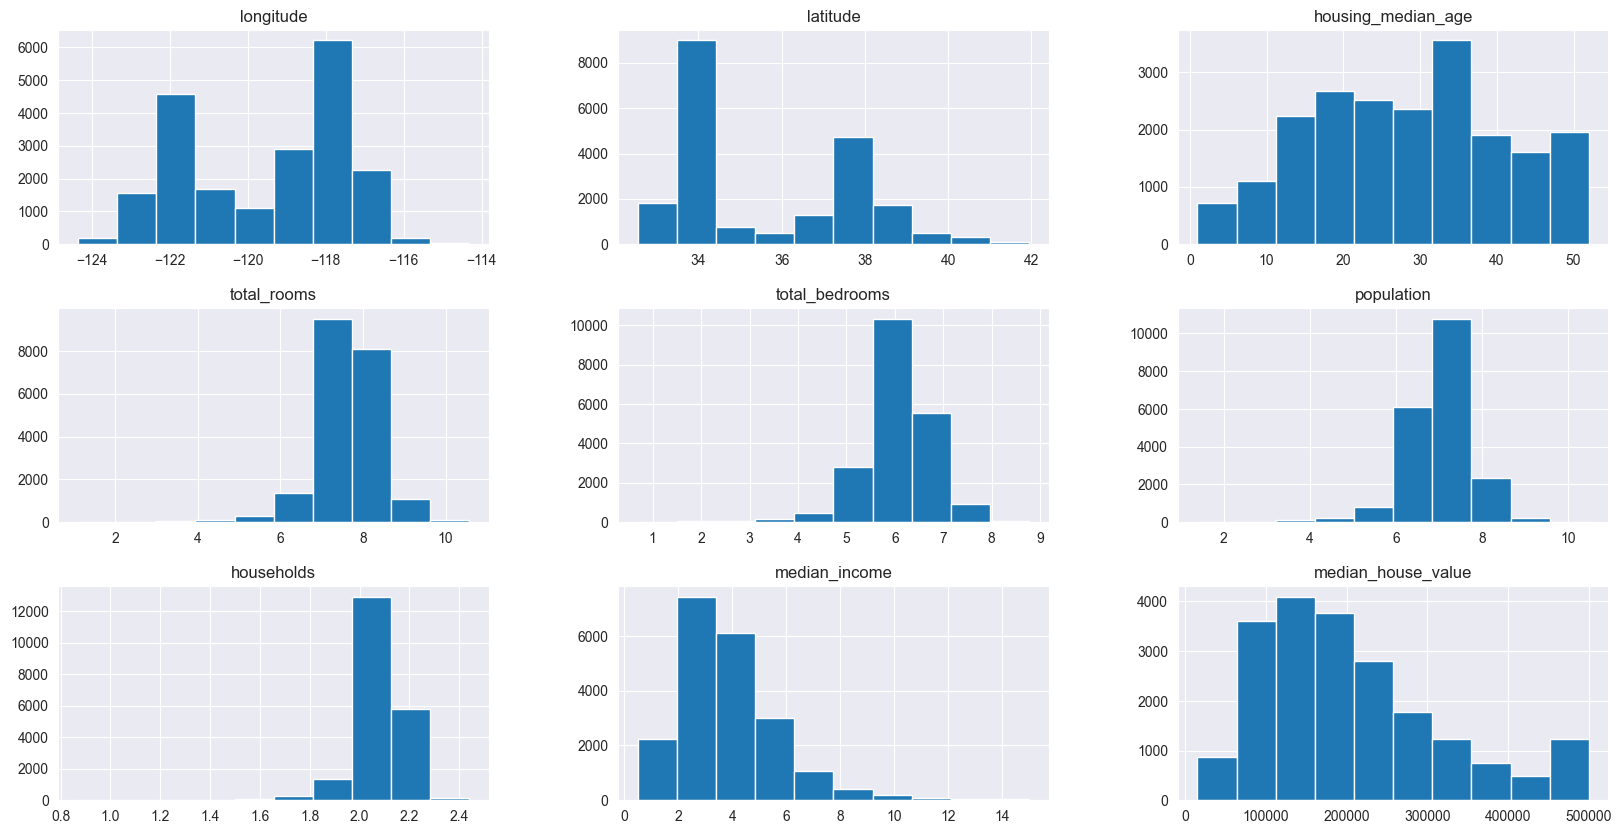

In [13]:
train_data_2.hist(figsize=(20,10))

In [14]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7314
INLAND        5225
NEAR OCEAN    2152
NEAR BAY      1816
ISLAND           5
Name: count, dtype: int64

In [15]:
train_data_2.join(pd.get_dummies(train_data.ocean_proximity,dtype=float))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,1.913631,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,2.172938,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,1.975273,7.2574,352100.0,NaN,NaN,NaN,NaN,NaN
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,1.991450,5.6431,341300.0,NaN,NaN,NaN,NaN,NaN
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,1.993147,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,2.046469,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,1.928289,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,2.068851,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,2.029378,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

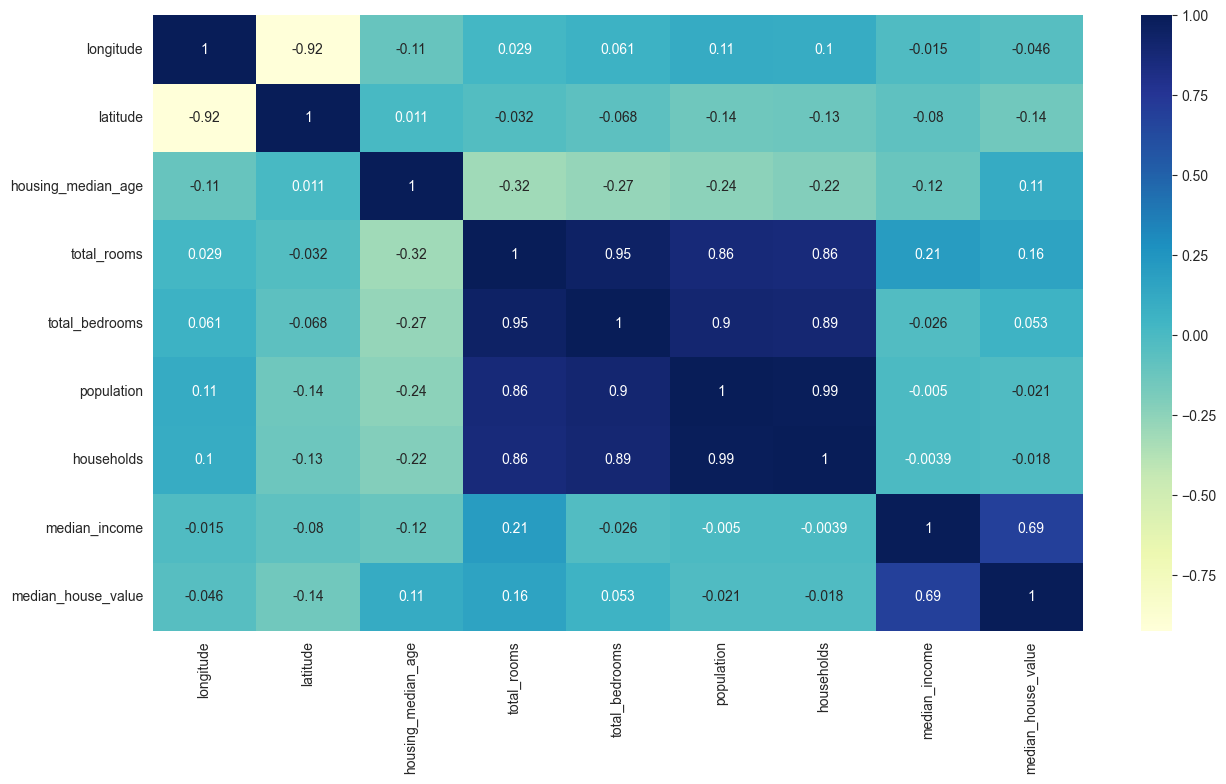

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_2.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

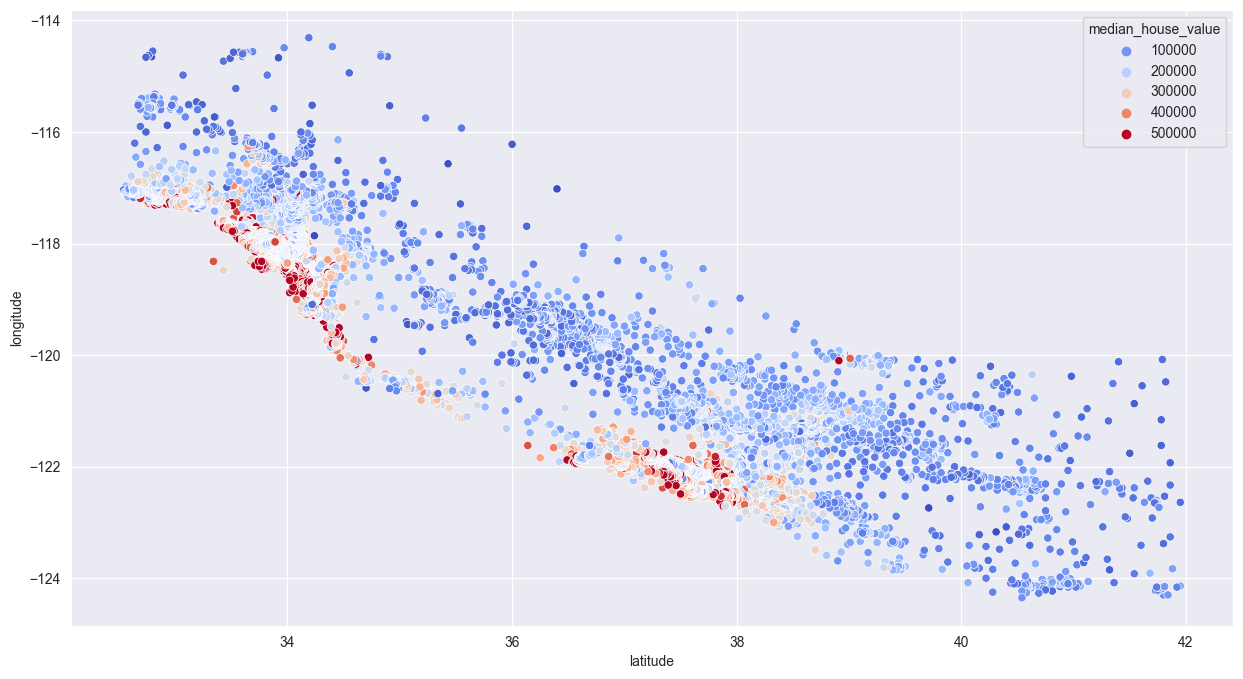

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data_2,hue="median_house_value",palette="coolwarm")

features engineering

In [18]:
train_data_2["bedrooms_ratio"]=train_data_2["total_bedrooms"]/train_data_2["total_rooms"]
train_data_2["households_rooms"]=train_data_2["total_rooms"]/train_data_2["households"]

<Axes: >

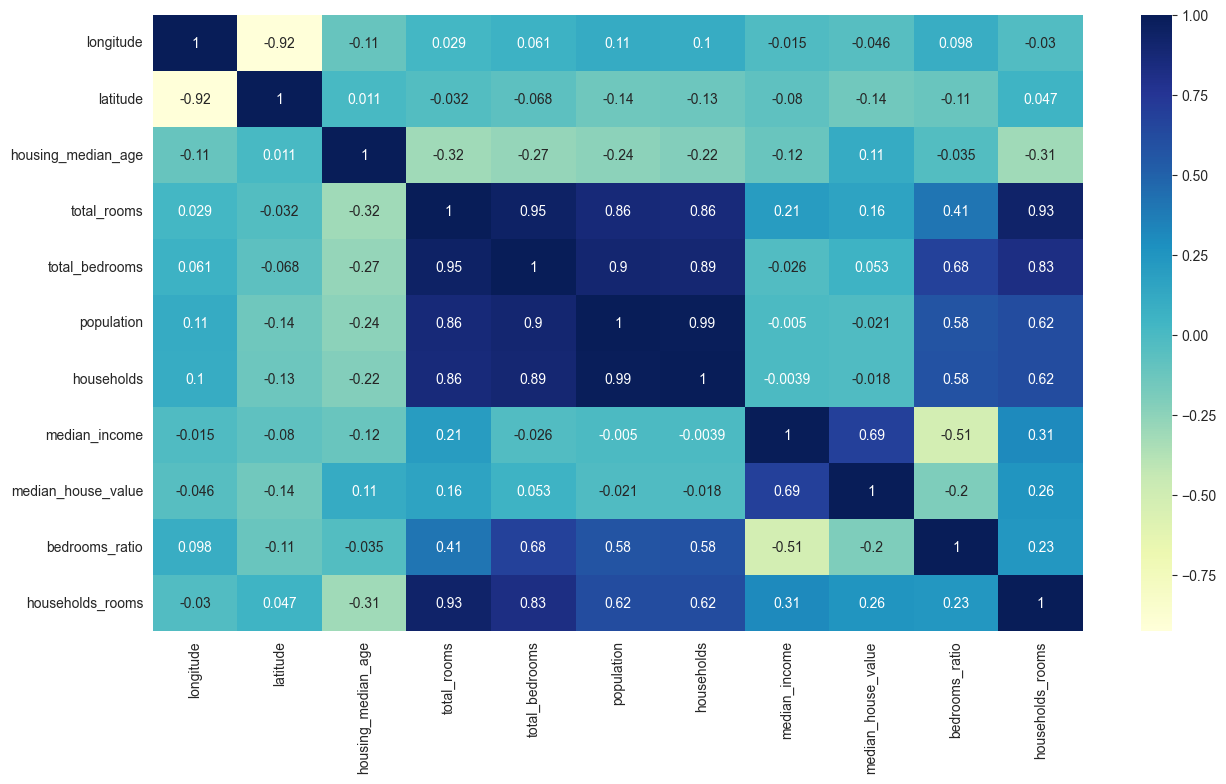

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_2.corr(),annot=True,cmap="YlGnBu")

The linear regression model

In [20]:
from sklearn.linear_model import LinearRegression
X_train,Y_train = train_data_2.drop(["median_house_value"],axis=1),train_data_2["median_house_value"]
reg = LinearRegression()
#reg.fit(X_train,Y_train)

here I got the following error : LinearRegression does not accept missing values encoded as NaN natively, so imma try fix it by deleting Nan values, ie replacing them with zeros

In [43]:
X_train=X_train.fillna(0)
Y_train=Y_train.fillna(0)
reg.fit(X_train,Y_train)

LinearRegression()

In [46]:
test_data= X_test.join(Y_test)
test_data["total_rooms"]=np.log(test_data["total_rooms"]+1)
test_data["total_bedrooms"]=np.log(test_data["total_bedrooms"]+1)
test_data["population"]=np.log(test_data["population"]+1)
test_data["households"]=np.log(test_data["population"]+1)

test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=float))
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=float))



In [47]:
test_data["bedrooms_ratio"]=test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["households_rooms"]=test_data["total_rooms"]/test_data["households"]

delete the ocean_proximity columns so train and test data are compatible,

In [57]:
test_data= data.drop(["ocean_proximity"],axis=1)

In [69]:
test_data["bedrooms_ratio"]=test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["households_rooms"]=test_data["total_rooms"]/test_data["households"]
test_data

0.6292417489777402

In [64]:
train_data_2

NameError: name 'scaler' is not defined